# Summary

Model fitting for optimal performance. In the manuscript: **Fig. 2A**.

This notebook requires to run `analysis/model_optimizing.py` first to generate the optimized model simulations.

---
# Setup

In [1]:
# imports
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from popy.config import COLORS, PROJECT_PATH_LOCAL

In [2]:
# local functions
def load_res():
    # show bic and LPT values
    
    # load behavior data
    floc = os.path.join(PROJECT_PATH_LOCAL, 'data', 'results', 'model_optimizing', f'optimization_results.csv')
    res_temp = pd.read_csv(floc)

    # simulations
    sim_floc = os.path.join(PROJECT_PATH_LOCAL, 'data', 'results', 'model_optimizing', f'simulation_behaviors.pkl')
    sim_data = pd.read_pickle(sim_floc)

    sim_data['best_arm'] = sim_data['action'] == sim_data['best_arm']
    for model in res_temp['Model'].unique():
        prop_best_target = sim_data.loc[sim_data['model'] == model, 'best_arm'].mean()
        res_temp.loc[res_temp['Model'] == model, 'prop_best_target'] = prop_best_target

    # change prob best arm in wsls agent to .99
    res_temp.loc[res_temp['Model'] == 'WSLS agent', 'prop_best_target'] = .77

    return res_temp

def plot_res(res_all, paper_format=False):
    # Set font size and figure size
    if paper_format:
        plt.rcParams.update({'font.size': 8})
        w, h = 4, 4
    else:
        plt.rcParams.update({'font.size': 8})
        w, h = 12, 5

    # Define the modes and figure
    modes = ['prop_best_target']
    fig, ax = plt.subplots(1, 1, figsize=(w/2.54, h/2.54))

    # Get unique values
    models = res_all['Model'].unique()
    #monkeys = res_all.loc[res_all['monkey'] != 'yu_DCZ', 'monkey'].unique()

    # Iterate over the modes and plot
    for mode_idx, mode in enumerate(modes):
        # Set up positions
        x = np.arange(len(models))
        width = 0.65  # Width of bars

        data = res_all
        values = [data.loc[data['Model'] == model, mode].iloc[0] if len(data.loc[data['Model'] == model]) > 0 else 0 for model in models]
        
        # Create bars with model-based coloring
        for j, (model, value) in enumerate(zip(models, values)):
            hatch = None
            if model.split()[0] == 'Standard':
                # replace  what comes after with RL
                color = COLORS['Standard RL']
                if not model == 'Standard RL - stickyness':
                    hatch = '///'  # Dashed filling pattern
            elif model.split()[0] == 'Inferential':
                color = COLORS['Inferential RL']
                if not model == 'Inferential RL - stickyness':
                    hatch = '///'  # Dashed filling pattern
            elif model.split()[0] == 'Foraging':
                color = COLORS['Foraging']
                if not len(model.split(" ")) == 1:
                    hatch = '///'  # Dashed filling pattern
            else:
                color = COLORS.get(model, 'grey')
                hatch = None
            alpha = 0.8
            
            
            bar = ax.bar(x[j], value, width, 
                color=color, hatch=hatch,
                edgecolor='black', linewidth=0.5, alpha=alpha)
            
            # Set hatch color to grey for RL-s models
            if model.split()[-1] == 'RL-s':
                import matplotlib as mpl
                mpl.rcParams['hatch.color'] = 'grey'

        # plot horizontal lines: optimal, monkey KA and monkey PO:
        y_optimal = 0.8171
        y_KA = 0.7742568470273881
        y_PO = 0.6373878299600445

        ax.axhline(y=y_optimal, color='black', linestyle='--', linewidth=1, label='Optimal', zorder=10)
        ax.axhline(y=y_KA, color=COLORS['ka'], linestyle='--', linewidth=1, label='Monkey KA', zorder=10)
        ax.axhline(y=y_PO, color=COLORS['po'], linestyle='--', linewidth=1, label='Monkey PO', zorder=10)
        
        ax.legend(fontsize=8, loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

        # Configure axes
        ax.set_ylim(0.60, 0.90)
        ax.set_yticks(np.arange(0.6, 0.9, 0.1))
        ax.set_ylabel('Prob. optimal target', fontsize=8)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        #ax.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)

        
        ax.set_xticks(x)
        ax.set_xticklabels(models, rotation=-90, horizontalalignment='center')
        

    return fig, ax


---
# Create figure

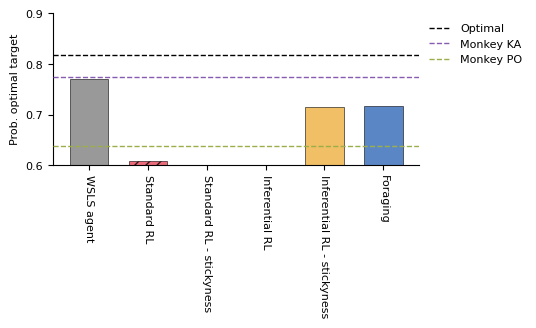

In [3]:
# load model fitting results
res_all = load_res()

# plot results
fig, ax = plot_res(res_all, paper_format=False)
plt.show()